# Final Year Project - Intelligent Health Monitoring System
#### by: Koo Chia Meng, A0165275Y

### FUZZY LOGIC SYSTEM WITH DATA SOURCE FROM ELSEWHERE

The following will be done in this notebook:
- Setting up fuzzy rule base criterias for the features and health indicators from the Health trackers.
- Combine and "Defuzzify" to give crisp value for health status of an individual.
- Calculate the accuracy for the Fuzzy logic system created.

The following variables will be used (membership functions will be defined according to studies researched:
- Sleep Duration
- Number of Steps
- HR
- SBP, DBP
- HDL, LDL
- Total Chol
- Triglycerides
- Glucose

For Fuzzy Logic, the library "skfuzzy" was used. See https://pythonhosted.org/scikit-fuzzy/ for documentations. 
Basic Memembership functions like Triangular and Trapezoidal functions will be used.


In [1]:
# Import library

import numpy as np
import skfuzzy as fuzz # scikit-fuzzy (Version 2.0)
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import datetime as dt

import seaborn as sns # use for visualising

In [2]:
def Create_Membership(min_val,max_val,step,list_of_range,list_of_label,plot_text):
    '''Create and plots Fuzzy 3 value (Low, mid, high) membership functions (two trapezoid for HIGH and LOW, one triangle for MID):
    Inputs: 
    - max_val, min_val of the range
    - list_of_range: [low value, mid value, high value]
    - list_of_label: list of Text labels/Meanings for Low, Mid and High, [low,mid,high]
    - plot_text: list of str For plotting, [name, x_label]
    
    Returns: Dict - {"low":mf_name_low, 
                    "mid":mf_name_mid, 
                    "high":mf_name_high}
                    
    Plots out the shape of the mfs for visualisation
    '''
    
    # Specifying x range:
    x_name = np.arange(min_val,max_val, step)
    low, mid, high = list_of_range[0],list_of_range[1],list_of_range[2]

    # Specifying Membership Function:
    mf_name_low = fuzz.trapmf(x_name,[min_val,min_val,low,mid])
    mf_name_mid = fuzz.trimf(x_name,[low,mid,high])
    mf_name_high = fuzz.trapmf(x_name,[mid,high,max_val,max_val])

    # Visualising the Membership Function:
    plt.figure(figsize=(10,5))
    plt.plot(x_name, mf_name_low, 'r', linewidth=1.5, label=list_of_label[0])
    plt.plot(x_name, mf_name_mid, 'b', linewidth=1.5, label=list_of_label[1])
    plt.plot(x_name, mf_name_high, 'g', linewidth=1.5, label=list_of_label[2])

    plt.title('Membership Functions for '+plot_text[0])
    plt.ylabel('Membership')
    plt.xlabel(plot_text[1])
    plt.legend()
    plt.show()
    
    return {'low':mf_name_low,'mid':mf_name_mid,'high':mf_name_high}
    

In [3]:
def Create_2state_Membership(min_val,max_val,step,list_of_range,list_of_label,plot_text):
    '''Create and plots Fuzzy 2 value (Low, high) membership functions (two trapezoid for HIGH and LOW):
    Inputs: 
    - max_val, min_val of the range
    - list_of_range: [low value, high value]
    - list_of_label: list of Text labels/Meanings for Low and High, [low,high]
    - plot_text: list of str For plotting, [name, x_label]
    
    Returns: Dict - {"low":mf_name_low, 
                    "high":mf_name_high}
                    
    Plots out the shape of the mfs for visualisation
    '''
    
    # Specifying x range:
    x_name = np.arange(min_val,max_val, step)
    low, high = list_of_range[0],list_of_range[1]

    # Specifying Membership Function:
    mf_name_low = fuzz.trapmf(x_name,[min_val,min_val,low,high])
    mf_name_high = fuzz.trapmf(x_name,[low,high,max_val,max_val])

    # Visualising the Membership Function:
    plt.figure(figsize=(10,5))
    plt.plot(x_name, mf_name_low, 'r', linewidth=1.5, label=list_of_label[0])
    plt.plot(x_name, mf_name_high, 'g', linewidth=1.5, label=list_of_label[1])

    plt.title('Membership Functions for '+plot_text[0])
    plt.ylabel('Membership')
    plt.xlabel(plot_text[1])
    plt.legend()
    plt.show()
    
    return {'low':mf_name_low,'high':mf_name_high}
    

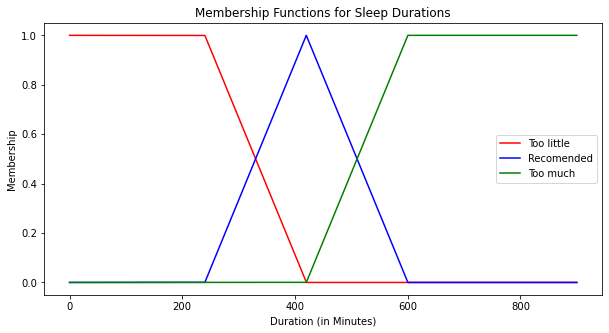

In [4]:
# Creating Fuzzy membership functions:

# For Sleep Durations (which recomended is 7 hours):
# "Too little", x < 5 hours, Trapezoid membership function
# "Recomended" , 4<=7<=10 hours, Triangle membership function
# "Too much" , x > 9 hours, Trapezoid membership function

min_val = 0
max_val = 15*60
step = 0.01
list_of_range = [4*60,7*60,10*60] # in minutes
list_of_label = ["Too little","Recomended","Too much"]
plot_text = ["Sleep Durations","Duration (in Minutes)"]

x_sleep_duration = np.arange(min_val,max_val, step)
mf_sleep_duration = Create_Membership(min_val,max_val,step,list_of_range,list_of_label,plot_text)


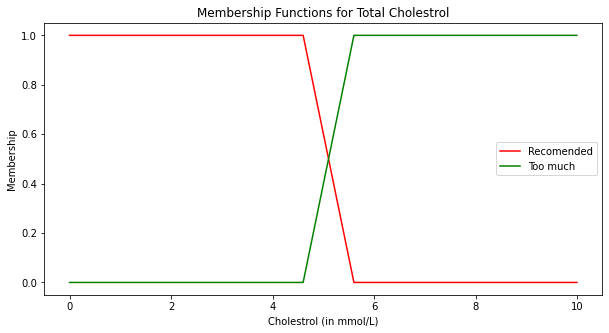

In [5]:
# Creating Fuzzy membership functions:

# For Total Cholestrol (which recomended < 5.2 mmol/L):
# "Recomended" , <=5.1, Trapezoid membership function
# "Too Much" , x > 5.2 , Trapezoid membership function

min_val = 0
max_val = 10
step = 0.01
list_of_range = [5.1-0.5,6.1-0.5]
list_of_label = ["Recomended","Too much"]
plot_text = ["Total Cholestrol","Cholestrol (in mmol/L)"]

x_total_chol = np.arange(min_val,max_val, step) # for float numbers
mf_total_chol = Create_2state_Membership(min_val,max_val,step,list_of_range,list_of_label,plot_text)


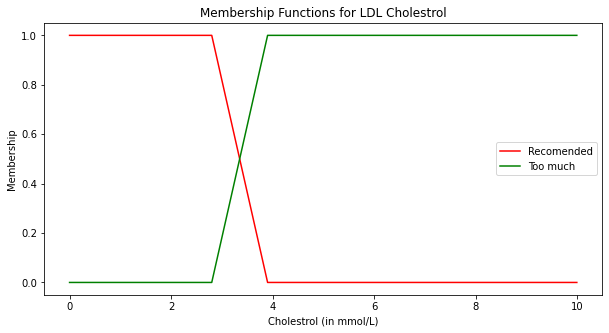

In [6]:
# Creating Fuzzy membership functions:

# For LDL (which recomended < 3.4 mmol/L):
# "Recomended" , <=3.3, Trapezoid membership function
# "Too Much" , x > 3.3, Trapezoid membership function

min_val = 0
max_val = 10
step = 0.01
list_of_range = [3.3-0.5,4.4-0.5] # in minutes
list_of_label = ["Recomended","Too much"]
plot_text = ["LDL Cholestrol","Cholestrol (in mmol/L)"]

x_Ldl_chol = np.arange(min_val,max_val, step)
mf_Ldl_chol = Create_2state_Membership(min_val,max_val,step,list_of_range,list_of_label,plot_text)


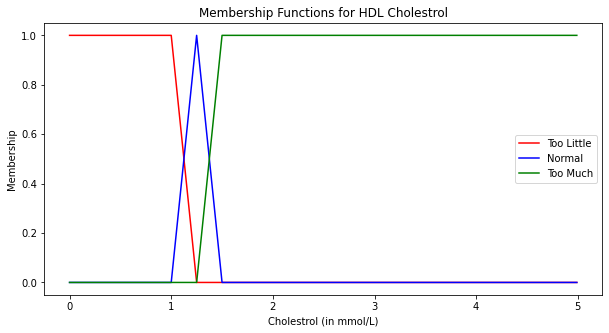

In [7]:
# Creating Fuzzy membership functions:

# For HDL Cholestrol (The higher the better):
# "Bad", x < 50 %, Trapezoid membership function
# "Normal" , 50<=60<=70 hours, Triangle membership function
# "Good" , x > 70, Trapezoid membership function

min_val = 0
max_val = 5
step = 0.01
list_of_range = [1.0,1.25,1.5]
list_of_label = ["Too Little","Normal","Too Much"]
plot_text = ["HDL Cholestrol","Cholestrol (in mmol/L)"]

x_Hdl_chol = np.arange(min_val,max_val, step)
mf_Hdl_chol = Create_Membership(min_val,max_val,step,list_of_range,list_of_label,plot_text)


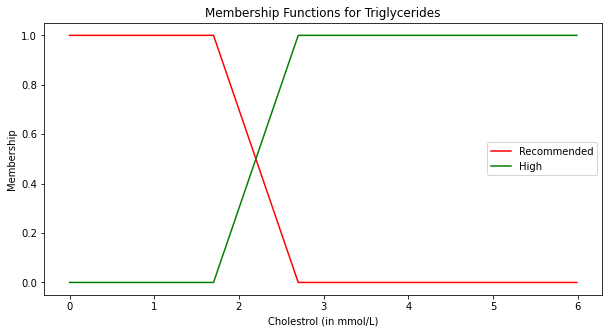

In [8]:
# Creating Fuzzy membership functions:

# For Triglycerides (recommended < 2.3 mmol/L):
# "Recommended", x <= 2.2 ms, Trapezoid membership function
# "Too Much" , x > 2.3 ms, Trapezoid membership function

min_val = 0
max_val = 6
step = 0.01
list_of_range = [2.2-0.5,3.2-0.5]
list_of_label = ["Recommended","High"]
plot_text = ["Triglycerides","Cholestrol (in mmol/L)"]

x_Triglycerides = np.arange(min_val,max_val, step)
mf_Triglycerides = Create_2state_Membership(min_val,max_val,step,list_of_range,list_of_label,plot_text)


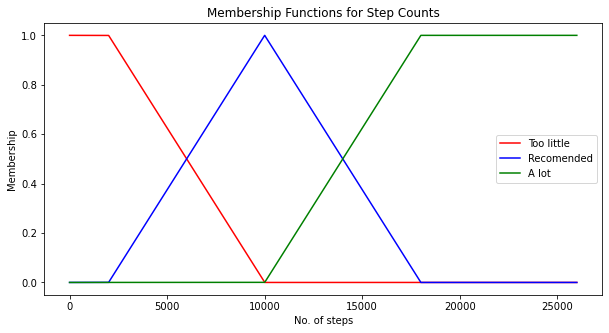

In [9]:
# Creating Fuzzy membership functions:

# For Number of Steps (which recomended is 10000):
# "Too little", x < 2000 hours, Trapezoid membership function
# "Recomended" , 2000 <=10000<=20000 hours, Triangle membership function
# "A lot" , x > 18000, Trapezoid membership function

min_val = 0
max_val = 26000
step = 1
list_of_range = [2000,10000,18000]
list_of_label = ["Too little","Recomended","A lot"]
plot_text = ["Step Counts","No. of steps"]

x_step_counts = np.arange(min_val,max_val, step)
mf_step_counts = Create_Membership(min_val,max_val,step,list_of_range,list_of_label,plot_text)


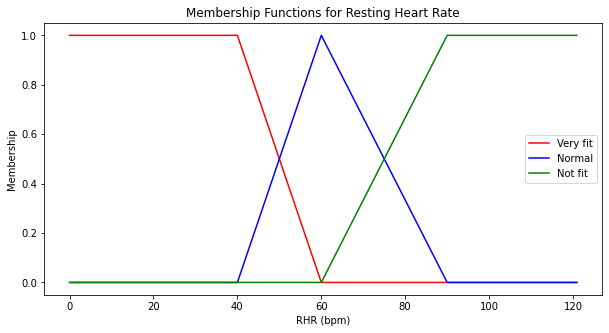

In [10]:
# Creating Fuzzy membership functions:

# For RHR (40 bpm  (very healthy), 50 - 70 (Normal), > 90 (unhealthy)):
# "Very fit", x < 40 bpm, Trapezoid membership function
# "Normal" , 40<=60<=90 hours, Triangle membership function
# "Not fit" , x > 90, Trapezoid membership function

min_val = 0
max_val = 121
step = 0.1
list_of_range = [40,60,90]
list_of_label = ["Very fit","Normal","Not fit"]
plot_text = ["Resting Heart Rate","RHR (bpm)"]

x_rhr = np.arange(min_val,max_val, step)
mf_rhr = Create_Membership(min_val,max_val,step,list_of_range,list_of_label,plot_text)


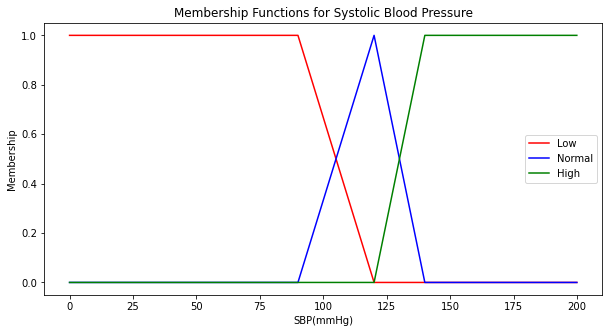

In [11]:
# Creating Fuzzy membership functions:

# For Blood Pressure, SBP (<90 (Hypotension) <120 mmHg (Norm), >140 High BP / Hypertension):
# "Low", x < 90, Trapezoid membership function
# "Normal" , 40<=60<=90 hours, Triangle membership function
# "High" , x >= 140, Trapezoid membership function

min_val = 0
max_val = 200
step = 0.1
list_of_range = [90,120,140]
list_of_label = ["Low","Normal","High"]
plot_text = ["Systolic Blood Pressure","SBP(mmHg)"]

x_SBP = np.arange(min_val,max_val, step)
mf_SBP = Create_Membership(min_val,max_val,step,list_of_range,list_of_label,plot_text)


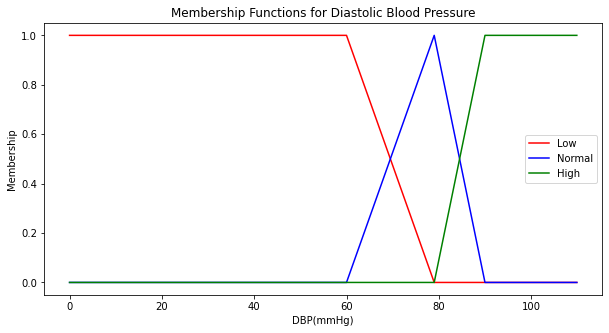

In [12]:
# Creating Fuzzy membership functions:

# For Blood Pressure, DBP (<60 (Hypotension) <80 mmHg (Norm), >90 High BP / Hypertension):
# "Low", x < 90, Trapezoid membership function
# "Normal" , 40<=60<=90 hours, Triangle membership function
# "High" , x >= 140, Trapezoid membership function

min_val = 0
max_val = 110
step = 0.1
list_of_range = [60,79,90]
list_of_label = ["Low","Normal","High"]
plot_text = ["Diastolic Blood Pressure","DBP(mmHg)"]

x_DBP = np.arange(min_val,max_val, step)
mf_DBP = Create_Membership(min_val,max_val,step,list_of_range,list_of_label,plot_text)


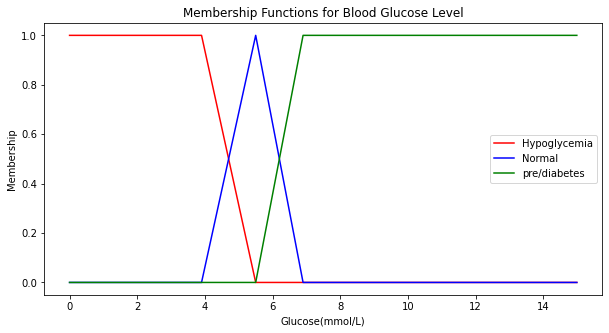

In [13]:
# Creating Fuzzy membership functions:

# Based on Fasting Glucose Test

# For Glucose Level (<3.9 mmol/L(Hypoglycemia), 5.5-6.8 (Normal), >=6.9 pre/diabetes):
# "Hypoglycemia", x <= 3.9, Trapezoid membership function
# "Normal" , 3.9<=5.4<=6.9 hours, Triangle membership function
# "pre/diabetes" , x >= 6.9, Trapezoid membership function

min_val = 0
max_val = 15.0
step = 0.01
list_of_range = [3.9,5.5,6.9]
list_of_label = ["Hypoglycemia","Normal","pre/diabetes"]
plot_text = ["Blood Glucose Level","Glucose(mmol/L)"]

x_Glucose = np.arange(min_val,max_val, step)
mf_Glucose = Create_Membership(min_val,max_val,step,list_of_range,list_of_label,plot_text)


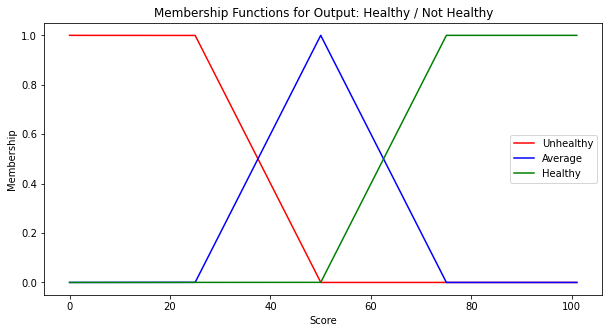

In [14]:
# Creating Fuzzy membership functions for Output:

# Output Function: HEALTHY or NOT HEALTHY
# "Unhealthy", x < 25, Trapezoid membership function
# "Average" , 25<=50<=75, Triangle membership function
# "Healthy" , x > 75, Trapezoid membership function

min_val = 0
max_val = 101
step = 0.01
list_of_range = [25,50,75]
list_of_label = ["Unhealthy","Average","Healthy"]
plot_text = ["Output: Healthy / Not Healthy","Score"]

x_health_score = np.arange(min_val,max_val, step)
mf_health_score = Create_Membership(min_val,max_val,step,list_of_range,list_of_label,plot_text)


# CHANGE INPUTS HERE:

In [15]:
current_directory = os.getcwd()
folder_path = os.path.join(current_directory,'Beyond fitness tracking, Weng et al, 2018 Feb 27')
file_name = 'Other_Source_Processed.csv'

df_profiles_final = pd.read_csv(os.path.join(folder_path,file_name),index_col='key_0')
df_profiles_final

,Gender,Age_x,BMI,Smoking_Hx,Smoking_Packs,Smoking_Duration,MH_Diabetes_Mellitus,MH_Hypertension,MH_Hyperlipidemia,MH_Cancer,...,SBP,DBP,HDL,LDL,TotalChol,Triglycerides,Glucose,Steps,age_cat,bmi_cat
key_0,,,,,,,,,,,,,,,,,,,,,
0115-0050-NHC,M,65,28.273129,Yes,1.0,35,No,No,No,No,...,117,81.0,1.16,5.77,7.98,2.32,5.7,3309.285714,50s & above,Overweight
0115-0066-NHC,M,48,24.088223,No,0.0,0,No,No,No,No,...,127,82.0,1.28,3.01,4.75,1.01,5.2,11065.750000,40s,Normal
0115-0070-NHC,F,51,20.880963,No,0.0,0,Unknown,Unknown,Unknown,Unknown,...,115,73.0,1.54,4.60,6.60,1.02,5.3,4659.285714,50s & above,Normal
0115-0074-NHC,F,41,22.647377,No,0.0,0,No,Unknown,No,No,...,135,89.0,1.43,3.74,5.71,1.20,6.1,9417.000000,40s,Normal
0115-0075-NHC,M,50,26.098104,No,0.0,0,No,No,No,No,...,129,76.0,1.13,3.17,4.75,0.99,5.1,9307.285714,50s & above,Overweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216-0033-NHC,F,48,21.130000,No,0.0,0,No,No,No,No,...,147,72.0,1.84,2.99,5.09,0.58,5.3,8914.222222,40s,Normal
1216-0064-NHC,F,60,20.690000,No,0.0,0,No,No,No,No,...,135,83.0,1.66,3.93,6.13,1.18,4.7,15001.833333,50s & above,Normal
1216-0070-NHC,F,54,26.760000,No,0.0,0,No,No,No,No,...,127,75.0,1.17,3.45,5.00,0.83,5.4,6954.000000,50s & above,Overweight


In [16]:
# Specifying Column names for eaier reference:

Generic_col = ['Gender','Age_x','BMI','Smoking_Hx'] # Generic Info
Smoker_col = ['Smoking_Packs','Smoking_Duration'] # Smoker info
Illness_col = ['MH_Diabetes_Mellitus','MH_Hypertension','MH_Hyperlipidemia','MH_Cancer'] # Existing illness info
Tracker_col = ['Sleep_Hours','Pulse_Rate','Steps'] # Health tracker stats
BP_col = ['SBP','DBP'] # Blood Pressure Info
Cholestrol_col = ['HDL','LDL','TotalChol','Triglycerides','Glucose'] # Cholestrol / Lipid Info

In [52]:
############# CHANGE HERE !!! #########

Subject_Select = '0415-0005-NHC'

# Input Values:
INPUT_DICT = {
'sleep_duration' : df_profiles_final.loc[Subject_Select,'Sleep_Hours'],
'step_counts' : df_profiles_final.loc[Subject_Select,'Steps'], 
'rhr' : df_profiles_final.loc[Subject_Select,'Pulse_Rate'], 
'SBP':df_profiles_final.loc[Subject_Select,'SBP'],
'DBP':df_profiles_final.loc[Subject_Select,'DBP'],
'HDL':df_profiles_final.loc[Subject_Select,'HDL'],
'LDL':df_profiles_final.loc[Subject_Select,'LDL'],
'TotalChol':df_profiles_final.loc[Subject_Select,'TotalChol'],
'Triglycerides':df_profiles_final.loc[Subject_Select,'Triglycerides'],
'Glucose':df_profiles_final.loc[Subject_Select,'Glucose']
}

# Run all below to find the Health Score.

In [56]:
INPUT_DICT

{'sleep_duration': 8.0,
 'step_counts': 3675.0,
 'rhr': 84.0,
 'SBP': 164,
 'DBP': 105.0,
 'HDL': 1.25,
 'LDL': 3.65,
 'TotalChol': 6.6,
 'Triglycerides': 3.75,
 'Glucose': 7.4}

In [53]:
# Using the same key as above INPUT_DICT:

# Membership Functions:

MF_DICT = {
'sleep_duration' : mf_sleep_duration,
'step_counts' : mf_step_counts, 
'rhr' : mf_rhr,
'SBP':mf_SBP,
'DBP':mf_DBP,
'HDL':mf_Hdl_chol,
'LDL':mf_Ldl_chol,
'TotalChol':mf_total_chol,
'Triglycerides':mf_Triglycerides,
'Glucose':mf_Glucose

}

In [54]:
# Using the same key as above INPUT_DICT:

# X Ranges for each variable:

X_RANGE_DICT = {
'sleep_duration' : x_sleep_duration,
'step_counts' : x_step_counts, 
'rhr' : x_rhr,
'SBP':x_SBP,
'DBP':x_DBP,
'HDL':x_Hdl_chol,
'LDL':x_Ldl_chol,
'TotalChol':x_total_chol,
'Triglycerides':x_Triglycerides,
'Glucose':x_Glucose
}

In [55]:
# Finding the degree of membership for the respective Inputs:

# Degree of Membership Dict:
def fuzzify_inputs(INPUT_DICT,X_RANGE_DICT,MF_DICT):
    DEGREE_DICT = {}

    for xxx in INPUT_DICT.keys():
        try:
            DEGREE_DICT[xxx] = {
                'low' : fuzz.interp_membership(X_RANGE_DICT[xxx],MF_DICT[xxx]['low'],INPUT_DICT[xxx]),
                'mid' : fuzz.interp_membership(X_RANGE_DICT[xxx],MF_DICT[xxx]['mid'],INPUT_DICT[xxx]),
                'high': fuzz.interp_membership(X_RANGE_DICT[xxx],MF_DICT[xxx]['high'],INPUT_DICT[xxx])
            }
        except:
            DEGREE_DICT[xxx] = {
                'low' : fuzz.interp_membership(X_RANGE_DICT[xxx],MF_DICT[xxx]['low'],INPUT_DICT[xxx]),
                'high': fuzz.interp_membership(X_RANGE_DICT[xxx],MF_DICT[xxx]['high'],INPUT_DICT[xxx])
            }
    return DEGREE_DICT

fuzzify_inputs(INPUT_DICT,X_RANGE_DICT,MF_DICT)

{'sleep_duration': {'low': 1.0, 'mid': 0.0, 'high': 0.0},
 'step_counts': {'low': 0.790625, 'mid': 0.209375, 'high': 0.0},
 'rhr': {'low': 0.0, 'mid': 0.2, 'high': 0.8},
 'SBP': {'low': 0.0, 'mid': 0.0, 'high': 1.0},
 'DBP': {'low': 0.0, 'mid': 0.0, 'high': 1.0},
 'HDL': {'low': 0.0, 'mid': 1.0, 'high': 0.0},
 'LDL': {'low': 0.22727272727272757, 'high': 0.7727272727272725},
 'TotalChol': {'low': 0.0, 'high': 1.0},
 'Triglycerides': {'low': 0.0, 'high': 1.0},
 'Glucose': {'low': 0.0, 'mid': 0.0, 'high': 1.0}}

# Defining Fuzzy Rules (Can be ajusted whenever there are more expert inputs / complex combination)


## Method #1:
### Combining all the variables to give the overall health score.

#### Mapping the input membership functions to the result membership function using Fuzzy Operators: 
(OR = Union = np.fmax, AND = Intersect = np.fmin) ->float, element-wise comparison

- Rule 1: If EITHER 
        - Sleep Duration or SBP, DBP,Gluscose is High OR Low, 
        - Number of steps & HDL is Low,
        - RHR,Total_Chol,LDL,Triglycerides is High; the person is Unhealthy.
- Rule 2: If all the variables are at the Recommended / Normal amount, health is Average.
- Rule 3: Only If the 
        - Step counts are at Recommended amount OR higher,
        - AND the Sleep Duration or SBP, DBP,Gluscose is at recommended amount,
        - AND the RHR,Total_Chol,LDL,Triglycerides,is Low,
        - AND the HDL is HIGH, the person is Healthy.


In [28]:
def find_health_score(DEGREE_DICT,x_health_score,mf_health_score):

    cols_lower_better = ['rhr','TotalChol','LDL','Triglycerides']
    cols_higher_better = ['step_counts','HDL']
    cols_mid_recomended = ['sleep_duration','SBP','DBP','Glucose']
    
# Applying the Fuzzy Rule #1,

    list_1,list_2,list_3,rule_1 = 0,0,0,0 # initialize

    # all the low degree = unhealthy
    for i in range(len(cols_higher_better)-1):
        list_1 = np.fmax(list_1,np.fmax(DEGREE_DICT[cols_higher_better[i]]['low'],
                                        DEGREE_DICT[cols_higher_better[i+1]]['low']))

    # all the high degree = unhealthy
    for i in range(len(cols_lower_better)-1):
        list_2 = np.fmax(list_2,np.fmax(DEGREE_DICT[cols_lower_better[i]]['high'],
                                        DEGREE_DICT[cols_lower_better[i+1]]['high']))

    # all the too high/low = unhealthy
    for i in range(len(cols_mid_recomended)-1): # since np.fmax / np.min only takes 2 input at a time
        list_3 = np.fmax(list_3,np.fmax(DEGREE_DICT[cols_mid_recomended[i]]['high'],
                                        DEGREE_DICT[cols_mid_recomended[i]]['low']))

    # taking the max of the the rest and the last indicators:
    rule_1 = np.fmax(list_1,np.fmax(list_2,list_3))

    # Map over to Output membership function (by Intersection) / clipping away the Output function:
    degree_health_score_low = np.fmin(rule_1,mf_health_score['low'])


# Applying the Fuzzy Rule #2, IF either one is average/recommended, Healthy = mid:

    list_1,list_2,rule_2 = 0,0,0 # initialize

    cols = [ i for i in cols_lower_better if i is not 'rhr'] # all the low degree that is unhealthy

    # for totalChol,Triglycerides,LDL
    for i in range(len(cols)-1):
        list_1 = np.fmax(list_1,np.fmax(DEGREE_DICT[cols[i]]['low'],
                                        DEGREE_DICT[cols[i+1]]['low']))
    # for the rest with 'mid'
    for i in range(len(cols_mid_recomended)-1): # since np.fmax / np.min only takes 2 input at a time
        list_2 = np.fmax(list_2,np.fmax(DEGREE_DICT[cols_mid_recomended[i]]['mid'],
                                        DEGREE_DICT[cols_mid_recomended[i+1]]['mid']))
    list_2 = np.fmax(list_2,DEGREE_DICT['rhr']['mid'])

    # taking the max of the the rest and the last indicator:
    rule_2 = np.fmax(list_1,list_2)

    # Map over to Output membership function (by Intersection):
    degree_health_score_mid = np.fmin(rule_2,mf_health_score['mid'])


# Applying the Fuzzy Rule #3,

    list_1,list_2,list_3,rule_3 = 1,1,1,1 # initialize

    # all the low degree = healthy
    for i in range(len(cols_lower_better)-1):
        list_1 = np.fmin(list_1,np.fmin(DEGREE_DICT[cols_lower_better[i]]['low'],
                                        DEGREE_DICT[cols_lower_better[i+1]]['low']))

    # all the high degree = healthy
    for i in range(len(cols_higher_better)-1):
        list_2 = np.fmin(list_2,np.fmin(DEGREE_DICT[cols_higher_better[i]]['high'],
                                        DEGREE_DICT[cols_higher_better[i+1]]['high']))

    # all the mid = healthy
    for i in range(len(cols_mid_recomended)-1): # since np.fmax / np.min only takes 2 input at a time
        list_3 = np.fmin(list_3,np.fmin(DEGREE_DICT[cols_mid_recomended[i]]['mid'],
                                        DEGREE_DICT[cols_mid_recomended[i+1]]['mid']))

    # taking the max of the the rest and the last indicators:
    rule_3 = np.fmin(list_1,np.fmin(list_2,list_3))

    # Map over to Output membership function (by Intersection) / clipping away the Output function:
    degree_health_score_high = np.fmin(rule_3,mf_health_score['high'])

    
### Overall Health Score From Method #1

    # Aggregate all the membership functions together (Union):
    aggregated = np.fmax(degree_health_score_low, 
                         np.fmax(degree_health_score_mid, degree_health_score_high))

    # Calculate defuzzified result:
    Health_Score = fuzz.defuzz(x_health_score, aggregated, 'centroid')

    return Health_Score,aggregated,degree_health_score_low,degree_health_score_mid,degree_health_score_high


The Aggregated Health Score is: 30.934

Degree:
Health Unhealthy: 0.763
Health Average: 0.237
Health Healthy: 0.0


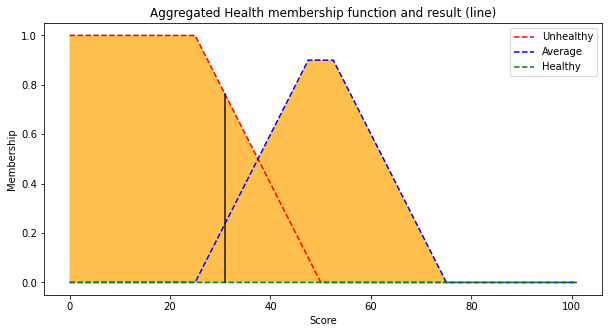

In [29]:
DEGREE_DICT = fuzzify_inputs(INPUT_DICT,X_RANGE_DICT,MF_DICT)
Health_Score,aggregated,degree_health_score_low,degree_health_score_mid,degree_health_score_high = find_health_score(DEGREE_DICT,x_health_score,mf_health_score)

plot_line_health = fuzz.interp_membership(x_health_score, aggregated, Health_Score)  # for plotting

# find the degree of health from the DeFuzzified value
# find the pair the plot line intersects
# Output example: 0.8 healthy, 0.2 Average

fz_health_score_low = fuzz.interp_membership(x_health_score,mf_health_score['low'], Health_Score)
fz_health_score_mid = fuzz.interp_membership(x_health_score,mf_health_score['mid'], Health_Score)
fz_health_score_high = fuzz.interp_membership(x_health_score,mf_health_score['high'], Health_Score)

# Printing out the overall result:
print("\nThe Aggregated Health Score is:", np.round(Health_Score,3))
print("\nDegree:\nHealth Unhealthy:", np.round(fz_health_score_low,3))
print("Health Average:", np.round(fz_health_score_mid,3))
print("Health Healthy:", np.round(fz_health_score_high,3))

# Visualize the result:
plt.figure(figsize=(10,5))

plt.plot(x_health_score, degree_health_score_low, '--r', linewidth=1.5, label='Unhealthy')
plt.plot(x_health_score, degree_health_score_mid, '--b', linewidth=1.5, label='Average')
plt.plot(x_health_score, degree_health_score_high, '--g', linewidth=1.5, label='Healthy')

plt.fill_between(x_health_score, np.zeros_like(x_health_score), aggregated, facecolor='Orange', alpha=0.7)

plt.plot([Health_Score, Health_Score], [0, plot_line_health], 'k', linewidth=1.5, alpha=0.9)

plt.title('Aggregated Health membership function and result (line)')
plt.xlabel('Score')
plt.ylabel('Membership')
plt.legend()
plt.show()

for #1, 
1. find which variable is in the unhealthy range.
2. Match up table for recomended action from DEGREE_DICT.

Sleep
- Sleep Duration

Activity
- Number of Steps

Heart Health
- RHR

Cholestrol
- TotalChol
- HDL
- LDL
- Triglycerides

Blood Pressure
- SBP
- DBP

Blood Sugar
- Glucose

In [30]:
# Putting into Dataframe for easier comparison

import pandas as pd
Deg_Variables = pd.DataFrame(DEGREE_DICT).fillna(0)
Deg_Variables

,sleep_duration,step_counts,rhr,SBP,DBP,HDL,LDL,TotalChol,Triglycerides,Glucose
low,1.0,0.836339,0.000000,0.1,0.000000,0.36,0.0,0.0,0.38,0.000000
mid,0.0,0.163661,0.266667,0.9,0.818182,0.64,0.0,0.0,0.00,0.857143
high,0.0,0.000000,0.733333,0.0,0.181818,0.00,1.0,1.0,0.62,0.142857


In [31]:
# After Transpose, criteria can be easier applied.

Deg_Variables_T = Deg_Variables.transpose()
Deg_Variables_T.loc[Deg_Variables_T.low > 0.5]

,low,mid,high
sleep_duration,1.000000,0.000000,0.0
step_counts,0.836339,0.163661,0.0


In [32]:
# Putting Output into Dataframe

Deg_Output = pd.DataFrame({'health_score':{ 'low':fz_health_score_low,
                                            'mid':fz_health_score_mid,
                                            'high':fz_health_score_high}
             })

Deg_Output

,health_score
high,0.000000
low,0.762649
mid,0.237351


### Recomending Actions:

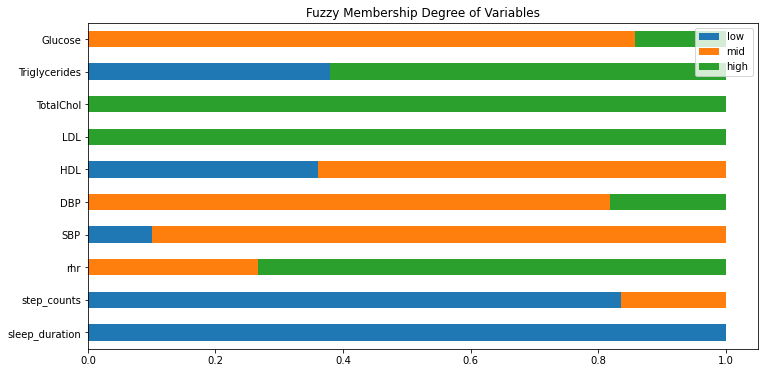

In [33]:
# Viewing the degree in graphical form:

Deg_Variables_T.plot.barh(stacked=True,figsize=(12,6),title="Fuzzy Membership Degree of Variables")

In [34]:
Deg_Variables

,sleep_duration,step_counts,rhr,SBP,DBP,HDL,LDL,TotalChol,Triglycerides,Glucose
low,1.0,0.836339,0.000000,0.1,0.000000,0.36,0.0,0.0,0.38,0.000000
mid,0.0,0.163661,0.266667,0.9,0.818182,0.64,0.0,0.0,0.00,0.857143
high,0.0,0.000000,0.733333,0.0,0.181818,0.00,1.0,1.0,0.62,0.142857


In [35]:
# adapted from https://www.kaggle.com/typewind/draw-a-radar-chart-with-python-in-a-simple-way

def plot_spider_chart(labels,breakdown_val,overall_score):
    
    angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    breakdown_val=np.concatenate((breakdown_val,[breakdown_val[0]]))
    angles=np.concatenate((angles,[angles[0]]))
    
    fig=plt.figure()
    ax = fig.add_subplot(111, polar=True)
    ax.plot(angles, breakdown_val, 'o-', linewidth=2)
    ax.fill(angles, breakdown_val, alpha=0.25)
    ax.set_thetagrids(angles * 180/np.pi, labels)
    ax.set_title('Overall Health Score:'+str(overall_score))
    ax.grid(True)
    plt.show()

In [36]:
# Creating a matchup table from "Deg_Variables":

def match_action(x):

    col = ['LDL','TotalChol','Triglycerides','Glucose']
    
    if x['high'] >= 0.9 and 'BP' in x.name: # Majority High for BP
        return "BP too high, consult doctor"
    if x['low'] >= 0.9 and 'BP' in x.name: # Majority Low for BP
        return "BP too low, consult doctor"
    if x['high'] >= 0.65 or x['low'] >= 0.65 and 'BP' in x.name:
        return "Needs to improve"
    if x['high'] >= 0.65 and x.name == 'rhr': # Majority High for RHR is Unhealthy
        return "Needs to improve"
    if x['high'] >= 0.65 and x.name == 'sleep_duration': # Majority High for RHR is Unhealthy
        return "Sleep too much"
    if x['high'] >= 0.65 and x.name in col: # Majority High for bad cholestrol and Glucose
        return "Watch your diet, exercise more."
    if x['high'] >= 0.9 and x.name in col: # Majority High for bad cholestrol
        return "Value too high, consult doctor"
    if x['low'] >= 0.65 and x.name != 'rhr'and x.name not in col: 
        # Majority Low for any indicators Except RHR or cholestrol/glucose is Unhealthy
        return "Needs to improve"
    else:
        return "OK"

In [37]:
Deg_Variables

,sleep_duration,step_counts,rhr,SBP,DBP,HDL,LDL,TotalChol,Triglycerides,Glucose
low,1.0,0.836339,0.000000,0.1,0.000000,0.36,0.0,0.0,0.38,0.000000
mid,0.0,0.163661,0.266667,0.9,0.818182,0.64,0.0,0.0,0.00,0.857143
high,0.0,0.000000,0.733333,0.0,0.181818,0.00,1.0,1.0,0.62,0.142857



activity :
step_counts         .....	Needs to improve

sleep :
sleep_duration      .....	Needs to improve

heart :
rhr                 .....	Needs to improve

Blood Pressure :
SBP                 .....	OK
DBP                 .....	OK

Cholestrol :
HDL                 .....	OK
LDL                 .....	Needs to improve
TotalChol           .....	Needs to improve
Triglycerides       .....	OK

Blood Sugar :
Glucose             .....	OK


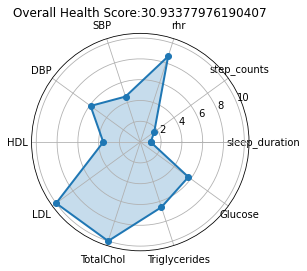

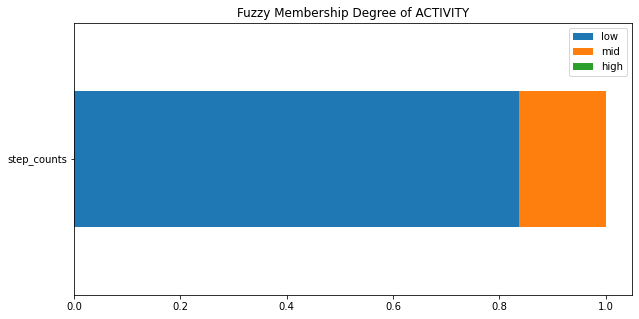

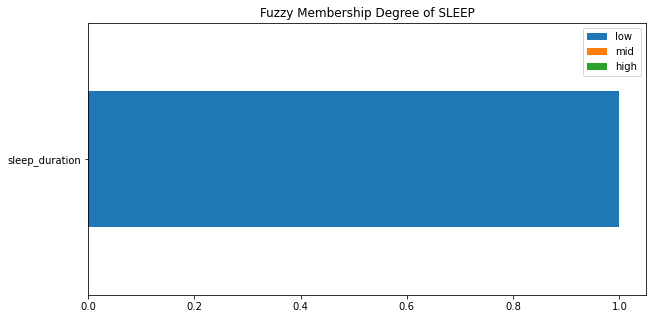

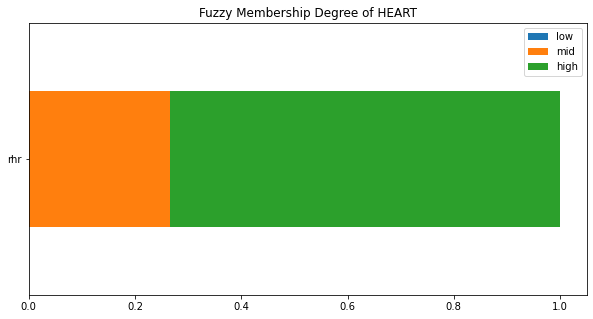

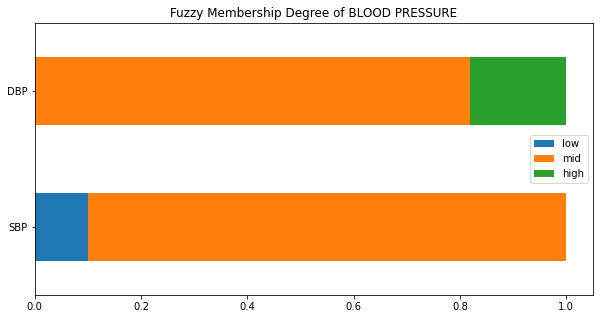

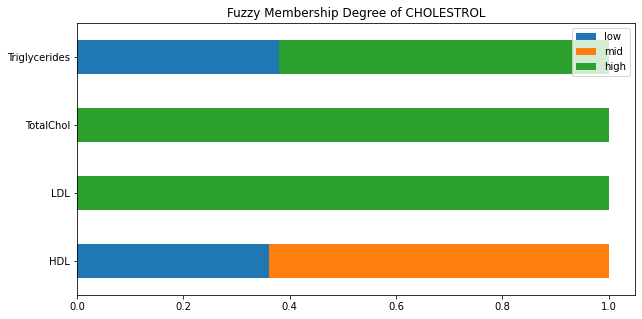

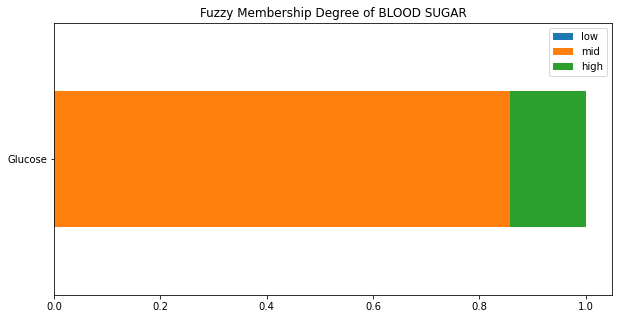

In [39]:
# View details
plots = {
    'activity' : ['step_counts'],
    'sleep' : ['sleep_duration'],
    'heart' : ['rhr'],
    'Blood Pressure' : ['SBP','DBP'], # Blood Pressure Info
    'Cholestrol' : ['HDL','LDL','TotalChol','Triglycerides'], # Cholestrol / Lipid Info
    'Blood Sugar' : ['Glucose']
}

def plot_breakdown_degree(Deg_Variables):

    for p in plots.keys():
        Deg_Variables[plots[p]].transpose().plot.barh(stacked=True,figsize=(10,5),title="Fuzzy Membership Degree of "+p.upper())

def recommend(Deg_Variables,Health_Score):
    
    # Appling to the transpose of the Deg_Variables: 
    for p in plots.keys():
        print('\n'+p,':\n'+'='*15)
        action = Deg_Variables[plots[p]].transpose().apply(match_action,axis=1)

        for i in plots[p]:
            print("{}.....\t{}".format(i.ljust(20), action.loc[i]))

    # print Spider Chart:
    df = Deg_Variables.copy()
    int_values = df.transpose()
    int_values.low = int_values.low*1
    int_values.mid = int_values.mid*5
    int_values.high = int_values.high*10
    int_values = int_values.sum(axis=1)

    plot_spider_chart(df.columns.tolist(),int_values.values,Health_Score)
    
recommend(Deg_Variables,Health_Score)
plot_breakdown_degree(Deg_Variables)

### Applying to all Subjects to see trends

In [40]:
all_score = []
all_DEGREE_DICT = {}

for subject in df_profiles_final.index.tolist():
    
    Subject_Select = subject

    # Input Values:
    INPUT_DICT = {
    'sleep_duration' : df_profiles_final.loc[Subject_Select,'Sleep_Hours'],
    'step_counts' : df_profiles_final.loc[Subject_Select,'Steps'], 
    'rhr' : df_profiles_final.loc[Subject_Select,'Pulse_Rate'], 
    'SBP':df_profiles_final.loc[Subject_Select,'SBP'],
    'DBP':df_profiles_final.loc[Subject_Select,'DBP'],
    'HDL':df_profiles_final.loc[Subject_Select,'HDL'],
    'LDL':df_profiles_final.loc[Subject_Select,'LDL'],
    'TotalChol':df_profiles_final.loc[Subject_Select,'TotalChol'],
    'Triglycerides':df_profiles_final.loc[Subject_Select,'Triglycerides'],
    'Glucose':df_profiles_final.loc[Subject_Select,'Glucose']
    }
    
    # convert to fuzzy inputs:
    DEGREE_DICT = fuzzify_inputs(INPUT_DICT,X_RANGE_DICT,MF_DICT)
    all_DEGREE_DICT[subject] = DEGREE_DICT
    
    # Apply Rules and Aggregate Health Score:
    all_score.append(find_health_score(DEGREE_DICT,x_health_score,mf_health_score)[0])

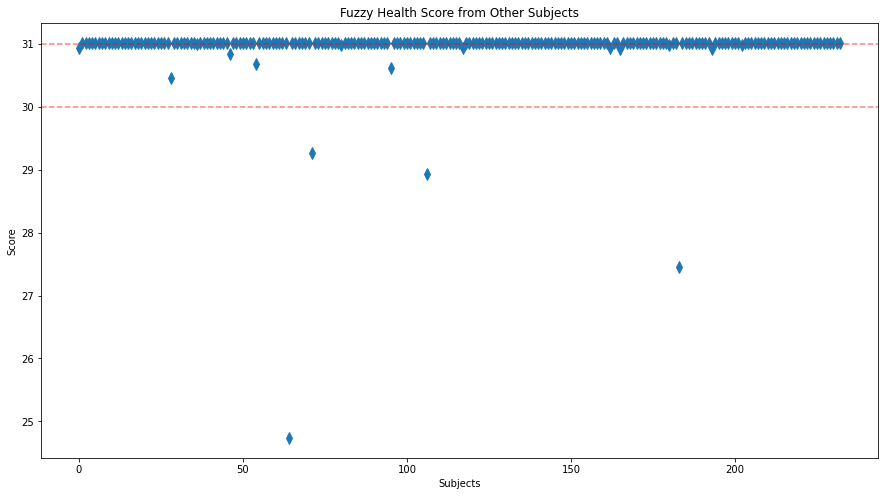

In [41]:
plt.figure(figsize=(15,8))
plt.plot(all_score,'d',markersize=8)
plt.axhline(31,xmax=len(all_score)-1,ls='--',c='r',alpha=0.5)
plt.axhline(30,xmax=len(all_score)-1,ls='--',c='r',alpha=0.5)
plt.title("Fuzzy Health Score from Other Subjects")
plt.xlabel("Subjects")
plt.ylabel("Score")
plt.show()

In [42]:
pd_all_scores = pd.Series(all_score,index=df_profiles_final.index)
pd_all_scores.name = "Health_Score"
pd_all_scores

key_0
0115-0050-NHC    30.933780
0115-0066-NHC    31.018519
0115-0070-NHC    31.018519
0115-0074-NHC    31.018519
0115-0075-NHC    31.018519
                   ...    
1216-0033-NHC    31.018519
1216-0064-NHC    31.018519
1216-0070-NHC    31.018519
1216-0073-NHC    31.018519
1216-0079-NHC    31.018519
Name: Health_Score, Length: 233, dtype: float64

In [43]:
pd_all_scores.value_counts()

31.018519    215
30.933780      3
30.985507      2
30.995120      1
24.735845      1
30.980950      1
30.674962      1
28.939217      1
29.263640      1
31.015729      1
30.455700      1
30.844775      1
30.623071      1
27.456140      1
30.924580      1
30.915888      1
Name: Health_Score, dtype: int64

In [44]:
pd_all_scores[pd_all_scores<30.0] # Investigat Lower Heath Score

key_0
0415-0005-NHC    24.735845
0415-0078-NHC    29.263640
0615-0003-NHC    28.939217
0916-0048-NHC    27.456140
Name: Health_Score, dtype: float64

In [45]:
unhealthier_subjects = pd_all_scores[pd_all_scores<30.0].index.tolist()
unhealthier_subjects

['0415-0005-NHC', '0415-0078-NHC', '0615-0003-NHC', '0916-0048-NHC']


SUBJECT ID : 0415-0005-NHC

activity :
step_counts         .....	Needs to improve

sleep :
sleep_duration      .....	Needs to improve

heart :
rhr                 .....	Needs to improve

Blood Pressure :
SBP                 .....	BP too high, consult doctor
DBP                 .....	BP too high, consult doctor

Cholestrol :
HDL                 .....	OK
LDL                 .....	Needs to improve
TotalChol           .....	Needs to improve
Triglycerides       .....	Needs to improve

Blood Sugar :
Glucose             .....	Needs to improve


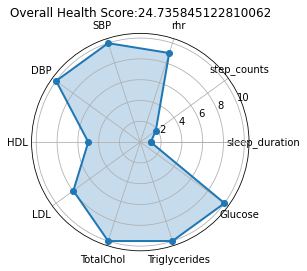


SUBJECT ID : 0415-0078-NHC

activity :
step_counts         .....	OK

sleep :
sleep_duration      .....	Needs to improve

heart :
rhr                 .....	OK

Blood Pressure :
SBP                 .....	BP too high, consult doctor
DBP                 .....	BP too high, consult doctor

Cholestrol :
HDL                 .....	Needs to improve
LDL                 .....	OK
TotalChol           .....	Needs to improve
Triglycerides       .....	Needs to improve

Blood Sugar :
Glucose             .....	Needs to improve


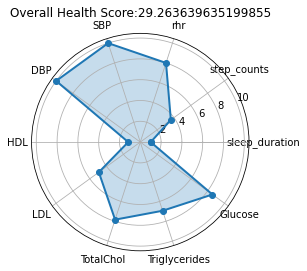


SUBJECT ID : 0615-0003-NHC

activity :
step_counts         .....	Needs to improve

sleep :
sleep_duration      .....	Needs to improve

heart :
rhr                 .....	Needs to improve

Blood Pressure :
SBP                 .....	Needs to improve
DBP                 .....	OK

Cholestrol :
HDL                 .....	Needs to improve
LDL                 .....	OK
TotalChol           .....	Needs to improve
Triglycerides       .....	Needs to improve

Blood Sugar :
Glucose             .....	OK


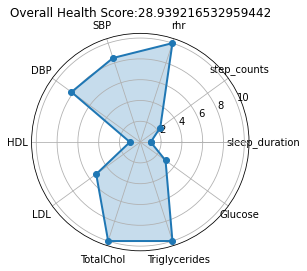


SUBJECT ID : 0916-0048-NHC

activity :
step_counts         .....	OK

sleep :
sleep_duration      .....	Needs to improve

heart :
rhr                 .....	OK

Blood Pressure :
SBP                 .....	BP too high, consult doctor
DBP                 .....	BP too high, consult doctor

Cholestrol :
HDL                 .....	Needs to improve
LDL                 .....	Needs to improve
TotalChol           .....	Needs to improve
Triglycerides       .....	Needs to improve

Blood Sugar :
Glucose             .....	Needs to improve


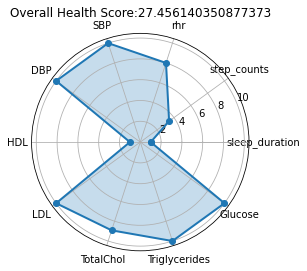

In [46]:
for subject in unhealthier_subjects:
    print("\nSUBJECT ID :",subject)
    print('='*30)
    recommend(pd.DataFrame(all_DEGREE_DICT[subject]),pd_all_scores[subject])
    

In [47]:
pd_all_scores[(pd_all_scores<31.0) & (pd_all_scores>=30.0)]

key_0
0115-0050-NHC    30.933780
0117-0034-NHC    30.455700
0215-0018-NHC    30.995120
0217-0026-NHC    30.844775
0315-0105-NHC    30.674962
0416-0063-NHC    30.980950
0516-0041-NHC    30.623071
0616-0028-NHC    30.933780
0816-0063-NHC    30.933780
0816-0079-NHC    30.915888
0916-0037-NHC    30.985507
1015-0038-NHC    30.924580
1016-0028-NHC    30.985507
Name: Health_Score, dtype: float64

In [48]:
len(pd_all_scores[(pd_all_scores<31.0) & (pd_all_scores>=30.0)])

13


SUBJECT ID : 0115-0050-NHC

activity :
step_counts         .....	Needs to improve

sleep :
sleep_duration      .....	Needs to improve

heart :
rhr                 .....	Needs to improve

Blood Pressure :
SBP                 .....	OK
DBP                 .....	OK

Cholestrol :
HDL                 .....	OK
LDL                 .....	Needs to improve
TotalChol           .....	Needs to improve
Triglycerides       .....	OK

Blood Sugar :
Glucose             .....	OK


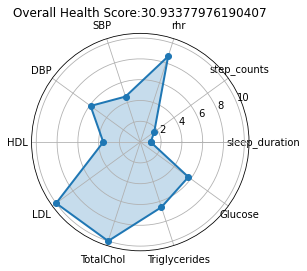


SUBJECT ID : 0117-0034-NHC

activity :
step_counts         .....	OK

sleep :
sleep_duration      .....	Needs to improve

heart :
rhr                 .....	OK

Blood Pressure :
SBP                 .....	Needs to improve
DBP                 .....	BP too high, consult doctor

Cholestrol :
HDL                 .....	OK
LDL                 .....	OK
TotalChol           .....	Needs to improve
Triglycerides       .....	Needs to improve

Blood Sugar :
Glucose             .....	OK


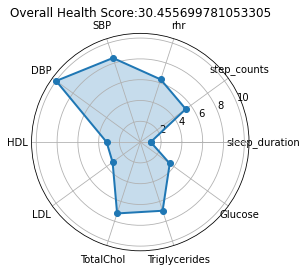


SUBJECT ID : 0215-0018-NHC

activity :
step_counts         .....	OK

sleep :
sleep_duration      .....	Needs to improve

heart :
rhr                 .....	OK

Blood Pressure :
SBP                 .....	OK
DBP                 .....	OK

Cholestrol :
HDL                 .....	Needs to improve
LDL                 .....	OK
TotalChol           .....	Needs to improve
Triglycerides       .....	OK

Blood Sugar :
Glucose             .....	OK


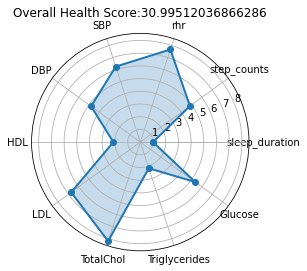


SUBJECT ID : 0217-0026-NHC

activity :
step_counts         .....	OK

sleep :
sleep_duration      .....	Needs to improve

heart :
rhr                 .....	OK

Blood Pressure :
SBP                 .....	BP too high, consult doctor
DBP                 .....	OK

Cholestrol :
HDL                 .....	Needs to improve
LDL                 .....	OK
TotalChol           .....	Needs to improve
Triglycerides       .....	OK

Blood Sugar :
Glucose             .....	OK


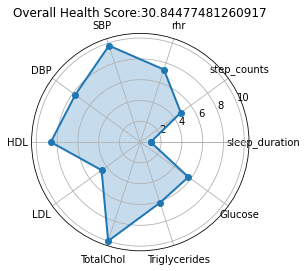


SUBJECT ID : 0315-0105-NHC

activity :
step_counts         .....	OK

sleep :
sleep_duration      .....	Needs to improve

heart :
rhr                 .....	Needs to improve

Blood Pressure :
SBP                 .....	BP too high, consult doctor
DBP                 .....	BP too high, consult doctor

Cholestrol :
HDL                 .....	Needs to improve
LDL                 .....	Needs to improve
TotalChol           .....	Needs to improve
Triglycerides       .....	OK

Blood Sugar :
Glucose             .....	OK


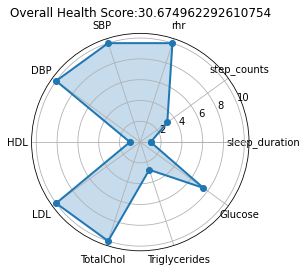


SUBJECT ID : 0416-0063-NHC

activity :
step_counts         .....	OK

sleep :
sleep_duration      .....	Needs to improve

heart :
rhr                 .....	OK

Blood Pressure :
SBP                 .....	Needs to improve
DBP                 .....	BP too high, consult doctor

Cholestrol :
HDL                 .....	OK
LDL                 .....	OK
TotalChol           .....	Needs to improve
Triglycerides       .....	OK

Blood Sugar :
Glucose             .....	OK


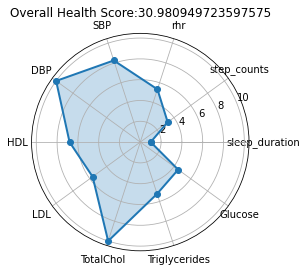


SUBJECT ID : 0516-0041-NHC

activity :
step_counts         .....	OK

sleep :
sleep_duration      .....	Needs to improve

heart :
rhr                 .....	OK

Blood Pressure :
SBP                 .....	BP too high, consult doctor
DBP                 .....	Needs to improve

Cholestrol :
HDL                 .....	OK
LDL                 .....	Needs to improve
TotalChol           .....	Needs to improve
Triglycerides       .....	OK

Blood Sugar :
Glucose             .....	OK


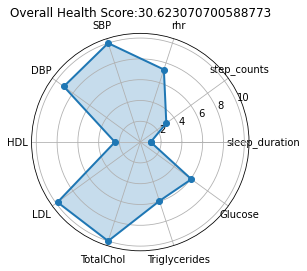


SUBJECT ID : 0616-0028-NHC

activity :
step_counts         .....	Needs to improve

sleep :
sleep_duration      .....	Needs to improve

heart :
rhr                 .....	Needs to improve

Blood Pressure :
SBP                 .....	OK
DBP                 .....	OK

Cholestrol :
HDL                 .....	OK
LDL                 .....	OK
TotalChol           .....	Needs to improve
Triglycerides       .....	Needs to improve

Blood Sugar :
Glucose             .....	OK


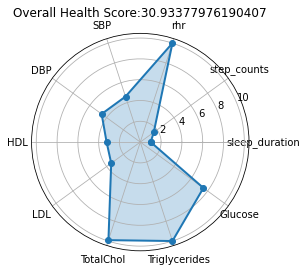


SUBJECT ID : 0816-0063-NHC

activity :
step_counts         .....	OK

sleep :
sleep_duration      .....	Needs to improve

heart :
rhr                 .....	OK

Blood Pressure :
SBP                 .....	OK
DBP                 .....	BP too low, consult doctor

Cholestrol :
HDL                 .....	OK
LDL                 .....	OK
TotalChol           .....	Needs to improve
Triglycerides       .....	Needs to improve

Blood Sugar :
Glucose             .....	OK


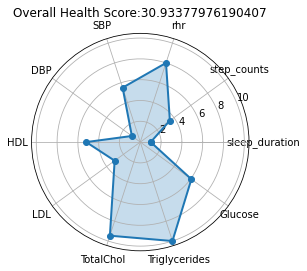


SUBJECT ID : 0816-0079-NHC

activity :
step_counts         .....	OK

sleep :
sleep_duration      .....	Needs to improve

heart :
rhr                 .....	Needs to improve

Blood Pressure :
SBP                 .....	BP too high, consult doctor
DBP                 .....	Needs to improve

Cholestrol :
HDL                 .....	Needs to improve
LDL                 .....	OK
TotalChol           .....	OK
Triglycerides       .....	OK

Blood Sugar :
Glucose             .....	OK


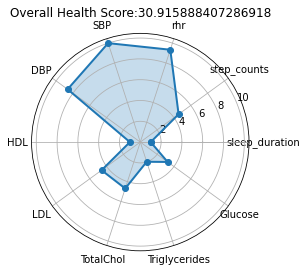


SUBJECT ID : 0916-0037-NHC

activity :
step_counts         .....	OK

sleep :
sleep_duration      .....	Needs to improve

heart :
rhr                 .....	Needs to improve

Blood Pressure :
SBP                 .....	OK
DBP                 .....	OK

Cholestrol :
HDL                 .....	OK
LDL                 .....	Needs to improve
TotalChol           .....	Needs to improve
Triglycerides       .....	Needs to improve

Blood Sugar :
Glucose             .....	OK


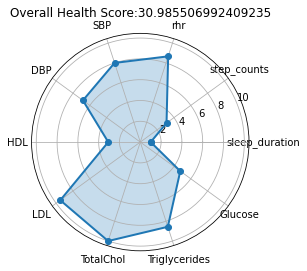


SUBJECT ID : 1015-0038-NHC

activity :
step_counts         .....	OK

sleep :
sleep_duration      .....	Needs to improve

heart :
rhr                 .....	OK

Blood Pressure :
SBP                 .....	BP too high, consult doctor
DBP                 .....	OK

Cholestrol :
HDL                 .....	Needs to improve
LDL                 .....	Needs to improve
TotalChol           .....	Needs to improve
Triglycerides       .....	Needs to improve

Blood Sugar :
Glucose             .....	OK


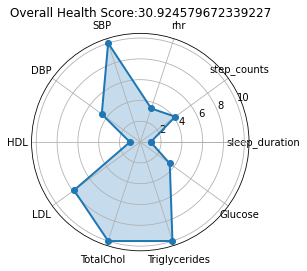


SUBJECT ID : 1016-0028-NHC

activity :
step_counts         .....	OK

sleep :
sleep_duration      .....	Needs to improve

heart :
rhr                 .....	OK

Blood Pressure :
SBP                 .....	OK
DBP                 .....	BP too low, consult doctor

Cholestrol :
HDL                 .....	Needs to improve
LDL                 .....	Needs to improve
TotalChol           .....	Needs to improve
Triglycerides       .....	OK

Blood Sugar :
Glucose             .....	OK


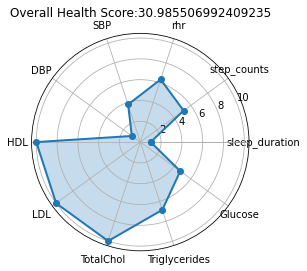

In [49]:
subjects_list = pd_all_scores[(pd_all_scores<31.0) & (pd_all_scores>=30.0)].index.tolist()
for subject in subjects_list:
    print("\nSUBJECT ID :",subject)
    print('='*30)
    recommend(pd.DataFrame(all_DEGREE_DICT[subject]),pd_all_scores[subject])
    

In [50]:
len(pd_all_scores[(pd_all_scores>=31.0)])

216


SUBJECT ID : 0115-0105-NHC

activity :
step_counts         .....	OK

sleep :
sleep_duration      .....	Needs to improve

heart :
rhr                 .....	OK

Blood Pressure :
SBP                 .....	OK
DBP                 .....	OK

Cholestrol :
HDL                 .....	OK
LDL                 .....	OK
TotalChol           .....	OK
Triglycerides       .....	OK

Blood Sugar :
Glucose             .....	OK


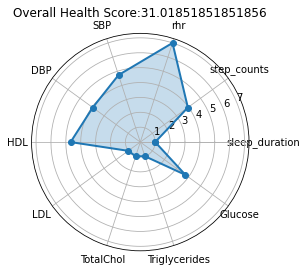

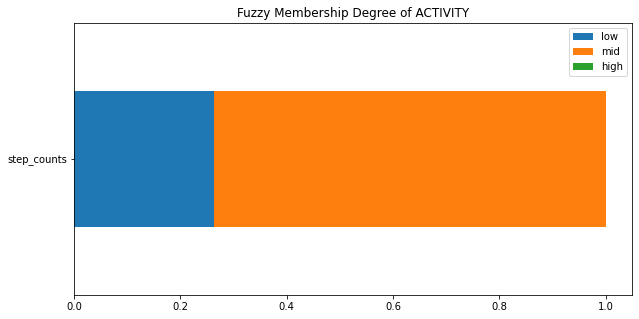

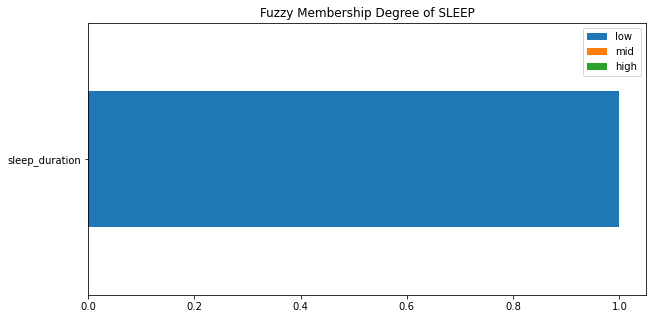

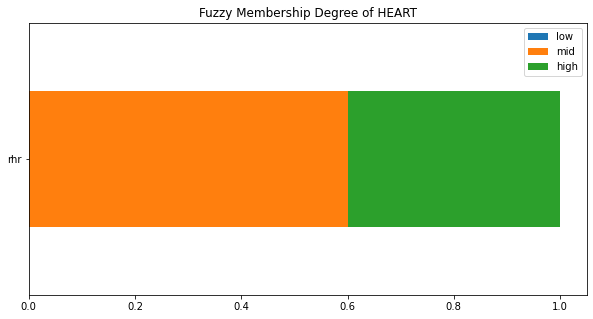

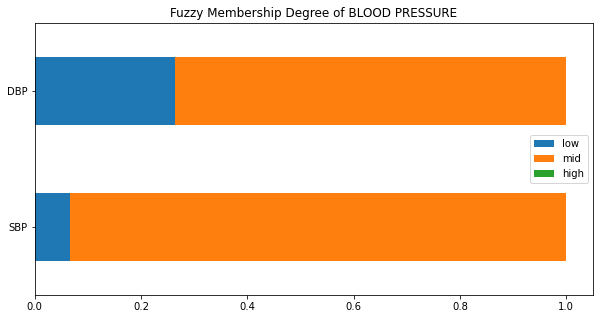

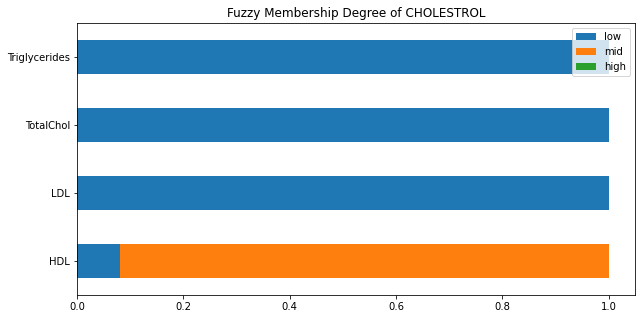

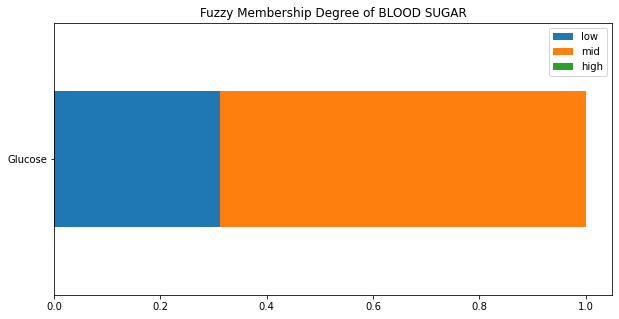

In [51]:
subject = pd_all_scores[(pd_all_scores>=31.0)].index.tolist()[5]
print("\nSUBJECT ID :",subject)
print('='*30)
recommend(pd.DataFrame(all_DEGREE_DICT[subject]),pd_all_scores[subject])
plot_breakdown_degree(pd.DataFrame(all_DEGREE_DICT[subject]))